# Lab 2

In [2]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia.340.fall.semester.2025qwerty/Retail_Food_Stores.csv') # load the data from s3
df.head() #show the top 5 rows

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Georeference
0,ALBANY,750931,Store,AC,EVANS JULIA,TERROSA,8,VERDA AVE,NaN,NaN,CLARKSVILLE,NY,12041,NaN,POINT (-73.949128787 42.577416307)
1,KINGS,619451,Store,AC,159-MP CORP,FOODTOWN,159,N 3RD ST,NaN,NaN,BROOKLYN,NY,11211,9000.0,POINT (-73.959567442 40.715342402)
2,KINGS,751355,Store,AC,YDHNY INC,YDHNY,25,N 5TH ST,NaN,NaN,BROOKLYN,NY,11249,NaN,POINT (-73.963025857 40.719355977)
3,SARATOGA,722816,Store,AC,IANS LLC,IANS,1500,RT 9,NaN,NaN,CLIFTON PARK,NY,12065,NaN,POINT (-73.742465504 42.837221945)
4,SUFFOLK,719057,Store,AC,HO 110 INC,EXXON,1350,RT 110,NaN,NaN,FARMINGDALE,NY,11735,1000.0,POINT (-73.423437971 40.737553896)


In [3]:
df.shape #show the number of rows and columns 

(24221, 15)

In [4]:
df.info() # shows the data types and number of null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24221 entries, 0 to 24220
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   County              24218 non-null  object 
 1   License Number      24221 non-null  int64  
 2   Operation Type      24221 non-null  object 
 3   Establishment Type  24221 non-null  object 
 4   Entity Name         24221 non-null  object 
 5   DBA Name            24221 non-null  object 
 6   Street Number       24160 non-null  object 
 7   Street Name         24221 non-null  object 
 8   Address Line 2      288 non-null    object 
 9   Address Line 3      1 non-null      object 
 10  City                24220 non-null  object 
 11  State               24221 non-null  object 
 12  Zip Code            24221 non-null  int64  
 13  Square Footage      19294 non-null  float64
 14  Georeference        24221 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 2.8

In [5]:
df.describe() #statistical summary of the data

,License Number,Zip Code,Square Footage
count,24221.000000,24221.000000,19294.000000
mean,625829.464679,11856.219851,6742.507515
std,191635.308154,1368.924807,19916.203726
min,10008.000000,6390.000000,0.000000
25%,610637.000000,10958.000000,1000.000000
50%,721708.000000,11379.000000,1800.000000
75%,745316.000000,12801.000000,4000.000000
max,763163.000000,14905.000000,500000.000000


## A. Viewing Data

This dataset has 24,221 rows and 15 columns, including those that are numeric (zip-code, license number) and textual (county, street name, and more). At first impression, I was surprised to see georeference as a column and and the large number of rows.

In [6]:
df = df.rename(columns={"Square Footage": "Area"}) #renaming column
df.head()

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Area,Georeference
0,ALBANY,750931,Store,AC,EVANS JULIA,TERROSA,8,VERDA AVE,NaN,NaN,CLARKSVILLE,NY,12041,NaN,POINT (-73.949128787 42.577416307)
1,KINGS,619451,Store,AC,159-MP CORP,FOODTOWN,159,N 3RD ST,NaN,NaN,BROOKLYN,NY,11211,9000.0,POINT (-73.959567442 40.715342402)
2,KINGS,751355,Store,AC,YDHNY INC,YDHNY,25,N 5TH ST,NaN,NaN,BROOKLYN,NY,11249,NaN,POINT (-73.963025857 40.719355977)
3,SARATOGA,722816,Store,AC,IANS LLC,IANS,1500,RT 9,NaN,NaN,CLIFTON PARK,NY,12065,NaN,POINT (-73.742465504 42.837221945)
4,SUFFOLK,719057,Store,AC,HO 110 INC,EXXON,1350,RT 110,NaN,NaN,FARMINGDALE,NY,11735,1000.0,POINT (-73.423437971 40.737553896)


In [7]:
df.isnull().sum() #show the number of rows containing null value

County                    3
License Number            0
Operation Type            0
Establishment Type        0
Entity Name               0
DBA Name                  0
Street Number            61
Street Name               0
Address Line 2        23933
Address Line 3        24220
City                      1
State                     0
Zip Code                  0
Area                   4927
Georeference              0
dtype: int64

In [65]:
## df = df.dropna() #drop null values
## df.isnull().sum()

### B. Cleaning Data

I renamed the "Square Footage" column to "Area" for sake of simplicity. I found many missing values, particularly within the columns "Address Line 2" which had 23,933 missing values, and "Address Line 3" which had 24,220. I did not handle or drop my missing values because if I did, I would have gotten rid of all my data.

In [8]:
df['City'] #select a column 

0          CLARKSVILLE
1             BROOKLYN
2             BROOKLYN
3         CLIFTON PARK
4          FARMINGDALE
             ...      
24216    RICHMOND HILL
24217         BROOKLYN
24218       BINGHAMTON
24219         WATERLOO
24220         BROOKLYN
Name: City, Length: 24221, dtype: object

In [9]:
df.sort_values(by='Area') #sort data by a column

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Area,Georeference
7658,MONROE,260413,Store,AC,DELTA SONIC CAR WASH SYSTEMS INC,KISS MART 813,718,E MAIN ST,NaN,NaN,ROCHESTER,NY,14605,0.0,POINT (-77.592955836 43.160587011)
8142,KINGS,612209,Store,AC,BED-ROSS GROCERY LLC,BED-ROSS GROCERY,104,ROSS ST (END OF RODNEY ST),NaN,NaN,BROOKLYN,NY,11249,0.0,POINT (-73.961658475 40.70364621)
8127,QUEENS,638547,Store,AC,JAY DELI GROCERY CORP,JAY DELI GROCERY,54-16,FLUSHING AVE,NaN,NaN,MASPETH,NY,11378,0.0,POINT (-73.912957606 40.715126526)
19369,ST. LAWRENCE,400230,Store,A,DOLGEN NEW YORK LLC,DOLLAR GENERAL 6066,232,N MAIN ST,NaN,NaN,MASSENA,NY,13662,0.0,POINT (-74.900179419 44.942878063)
8158,WASHINGTON,530190,Store,AC,SANDORA PENNY,NORTHEAST CRNR HERB FRM,185,LAKE NEBO RD,NaN,NaN,FORT ANN,NY,12827,0.0,POINT (-73.560179478 43.442453315)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24187,SARATOGA,719075,Store,A,DOLGEN NEW YORK LLC,DOLLAR GENERAL #15734,162,W MILTON RD,NaN,NaN,BALLSTON SPA,NY,12020,NaN,POINT (-73.928079146 43.036866222)
24191,KINGS,756929,Store,AC,YOUGH TO GO LLC,YOUGH,203,KNICKERBOCKER AVE. STORE LE,NaN,NaN,BROOKLYN,NY,11237,NaN,POINT (-73.926467306 40.703570941)
24199,BRONX,743073,Store,AC,FOAD MUTHANA & MOHAMAD RASHEED,ARCHER CONVENIENCE STORE,1501,WHITEPLAINS ROAD,NaN,NaN,BRONX,NY,10462,NaN,POINT (-73.863768994 40.837949948)
24200,BRONX,751044,Store,AC,M&A FRUITS & DELI CORP,M&A FRUITS & DELI,1976,ARTHUR AVENUE STORE 76,NaN,NaN,BRONX,NY,10457,NaN,POINT (-73.892976155 40.846822276)


In [11]:
df[0:10] #slice by rows

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Area,Georeference
0,ALBANY,750931,Store,AC,EVANS JULIA,TERROSA,8,VERDA AVE,NaN,NaN,CLARKSVILLE,NY,12041,NaN,POINT (-73.949128787 42.577416307)
1,KINGS,619451,Store,AC,159-MP CORP,FOODTOWN,159,N 3RD ST,NaN,NaN,BROOKLYN,NY,11211,9000.0,POINT (-73.959567442 40.715342402)
2,KINGS,751355,Store,AC,YDHNY INC,YDHNY,25,N 5TH ST,NaN,NaN,BROOKLYN,NY,11249,NaN,POINT (-73.963025857 40.719355977)
3,SARATOGA,722816,Store,AC,IANS LLC,IANS,1500,RT 9,NaN,NaN,CLIFTON PARK,NY,12065,NaN,POINT (-73.742465504 42.837221945)
4,SUFFOLK,719057,Store,AC,HO 110 INC,EXXON,1350,RT 110,NaN,NaN,FARMINGDALE,NY,11735,1000.0,POINT (-73.423437971 40.737553896)
5,BRONX,728045,Store,AC,BIG SAL DELI INC,BIG SAL DELI,1361,OGDEN AVE,NaN,NaN,BRONX,NY,10452,NaN,POINT (-73.924907266 40.841683625)
6,WESTCHESTER,752115,Store,AC,NFM GROUP LLC,NFM GOURMET DELI,231,NORTH AVE,NaN,NaN,NEW ROCHELLE,NY,10801,NaN,POINT (-73.781459583 40.910737968)
7,NIAGARA,290011,Store,A,ALDI INC,ALDI 83,6035,PORTER RD,NaN,NaN,NIAGARA FALLS,NY,14305,15000.0,POINT (-78.992660576 43.10655676)
8,BRONX,748243,Store,A,PEOPLES DRUG RX INC,PEOPLES DRUG RX,3176,BAINBRIDGE AVE,NaN,NaN,BRONX,NY,10467,NaN,POINT (-73.879369643 40.875530462)
9,KINGS,730459,Store,AC,MCKINLEY DELI AND GROCERY CORP,MCKINLEY DELI AND GROCERY,230,MCKINLEY AVENUE,NaN,NaN,BROOKLYN,NY,11208,NaN,POINT (-73.867387964 40.680373689)


In [16]:
df[df['Area']>100000]

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Area,Georeference
121,WESTCHESTER,550833,Store,ABC,STEW LEONARDS YONKERS LLC,STEW LEONARDS,1,STEW LEONARDS DR,NaN,NaN,YONKERS,NY,10710,135000.0,POINT (-73.863444607 40.976112474)
191,SUFFOLK,471591,Store,A,WAL-MART STORES EAST LP,WAL-MART 2156,750,MIDDLE COUNTRY RD,NaN,NaN,MIDDLE ISLAND,NY,11953,125500.0,POINT (-72.94711434 40.880047386)
280,ERIE,142295,Store,A,WALGREEN EASTERN CO INC,WALGREENS #10442,2739,DELAWARE AVE,NaN,NaN,KENMORE,NY,14217,120000.0,POINT (-78.868990456 42.958918001)
538,SCHENECTADY,420216,Store,AC,TARGET CORPORATION,TARGET STORES #1521,428,BALLTOWN RD,NaN,NaN,NISKAYUNA,NY,12304,126000.0,POINT (-73.889397417 42.775176038)
600,ONONDAGA,310003,Store,ABC,BJS WHOLESALE CLUB INC,BJS WHOLESALE CLUB 68,4145,RT 31,NaN,NaN,CLAY,NY,13041,115660.0,POINT (-76.232744277 43.190111636)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23788,NIAGARA,702622,Store,AC,WAL-MART STORES EAST LP,WAL-MART SPR CTR 4597,886,NIAGARA FALLS BLVD,NaN,NaN,NORTH TONAWANDA,NY,14120,160000.0,POINT (-78.84363587 43.055870846)
23991,ONEIDA,742395,Store,ACD,ALDER CREEK BEVERAGES LLC,NIRVANA,12044,STATE RT 12,NaN,NaN,BOONVILLE,NY,13309,230000.0,POINT (-75.249179739 43.439340989)
24067,KINGS,616666,Store,ABC,BJS WHOLESALE CLUB INC,BJS WHOLESALE CLUB 138,339,GATEWAY DR,NaN,NaN,BROOKLYN,NY,11239,127000.0,POINT (-73.873392676 40.65079127)
24138,CHEMUNG,75338,Store,ABC,SAMS EAST INC,SAMS CLUB 6431,830,CTY RT 64 BLDG 2,NaN,NaN,ELMIRA,NY,14903,134500.0,POINT (-76.8751128 42.153369119)


#### C. Manipulate the Data

I selected the "City" column in my dataset, sorted the data by the "Area" column, and sliced 10 rows. I filtered the data to only show me the stores with an area above 100,000 square feet which in this case, are only 223 big department stores like Target and Wal-Mart.

In [85]:
sum_store_area_by_county = df.groupby('County')['Area'].sum()
sum_store_area_by_county.head()

County
ALBANY         3092179.0
ALLEGANY        295057.0
BRONX          4945685.0
BROOME         1782102.0
CATTARAUGUS     853562.0
Name: Area, dtype: float64

<Axes: title={'center': 'Sum of Total Store Area by New York County'}, xlabel='County', ylabel='Area'>

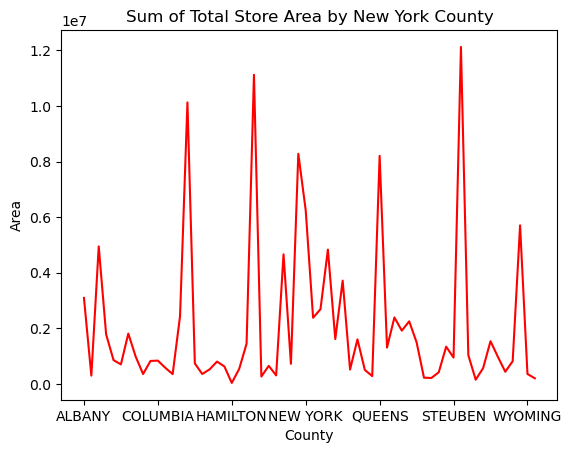

In [84]:
sum_store_area_by_county.plot(title="Sum of Total Store Area by New York County", x="County", ylabel="Area", color='Red')

<Axes: title={'center': 'Top 10 Entities (Stores) by Area in New York'}, xlabel='Entity Name', ylabel='Area'>

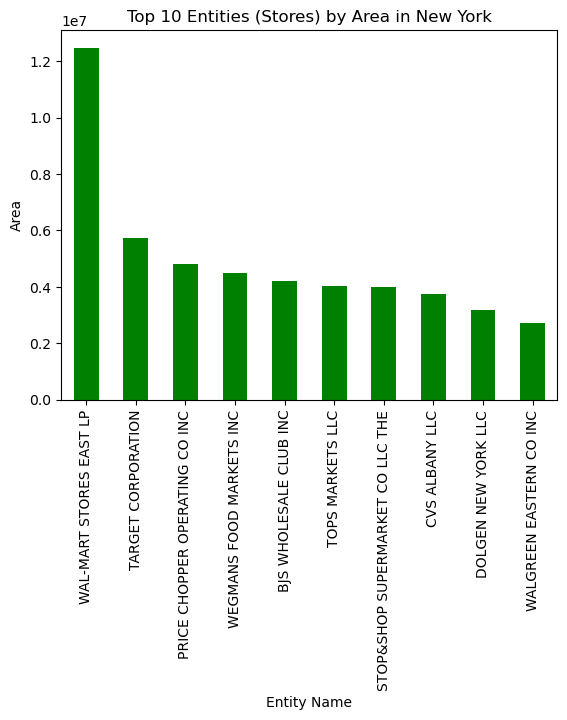

In [83]:
sum_area_by_entity_name = df.groupby('Entity Name')['Area'].sum()
sum_area_by_entity_name.nlargest(10).plot.bar(title="Top 10 Entities (Stores) by Area in New York", x="Entity Name", ylabel="Area", color='Green')

##### D. Group & Visualize the Data

My first plot depicts the sum of all store area by seven counties in New York. The plot shows spikes to after each county labeled, with Steuben county reaching the peak due to its total area being 1.2 with Hamilton being a close second largest by area at 1.1.

My second visualization is a bar graph showing the top 10 entities (stores) by area in New York. The graph depicts Wal-mart's as the entity with the largest total area in the region, with the graph suffering a steep drop to show the second largest entity by area which is Target, reaching only half of Wal-mart's total area. After Target, the rest of the 8 entities appear to be of similar square footage with the smallest store of the bunch being Walgreens.